In [13]:
# """
# Machine Learning Script for Crop Yield Prediction
#-------------------------------------------------

# This script performs exploratory data analysis (EDA) and builds two 
# machine-learning models — Linear Regression(LR) and Random Forest(RF) — to 
# predict crop yield based on rainfall and temperature.

# The script includes:
# 1. Data loading and inspection
# 2. Column cleaning / renaming
# 3. Exploratory visualizations
# 4. Grouped statistical summaries
# 5. Heatmaps and barplots
# 6. Train–test split for machine learning
# 7. Model training (LR & RF)
# 8. Model evaluation (R² and MSE)
# 9. Feature importance visualization
# """

In [14]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
# LOAD AND INSPECT DATA

# Load dataset containing crop, region, rainfall, temperature, and yield information
data = pd.read_csv("/Users/afriyie/Downloads/Crop_prediction/crop_yield.csv")

# Show first few rows to understand dataset structure
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [16]:
# Display column types and missing values (if any)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [17]:
# RENAME COLUMNS (CLEANER NAMES FOR ANALYSIS)

data_rename = data.rename(columns={
    "Region": "region",
    "Crop": "crop",
    "Soil_Type": "soil_type",
    "Rainfall_mm": "rainfall",
    "Weather_Condition": "weather",
    "Fertilizer_Used": "fertilized",
    "Irrigation_Used": "irrigated",
    "Temperature_Celsius": "temperature",
    "Yield_tons_per_hectare": "yield",
    "Days_to_Harvest": "harvest_days"
})

data_rename.head()

,region,soil_type,crop,rainfall,temperature,fertilized,irrigated,weather,harvest_days,yield
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


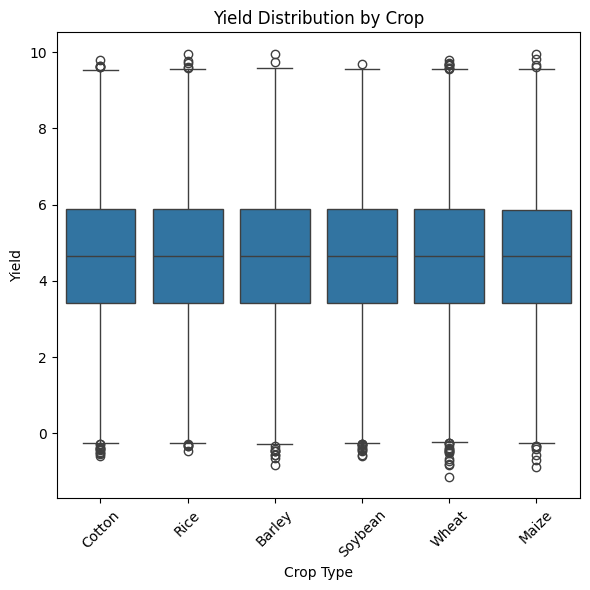

In [18]:
# VISUALIZE YIELD DISTRIBUTION BY CROP

plt.figure(figsize=(6, 6))
sns.boxplot(x="crop", y="yield", data=data_rename)
plt.title("Yield Distribution by Crop")
plt.xlabel("Crop Type")
plt.ylabel("Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Yield + rainfall + temperature averages by region, crop, fertilizer etc.
region_total = data_rename.groupby(
    ["region", "crop", "fertilized", "irrigated", "weather"]
)[["rainfall", "temperature", "yield", "harvest_days"]].mean().reset_index()

region_total.head()

,region,crop,fertilized,irrigated,weather,rainfall,temperature,yield,harvest_days
0,East,Barley,False,False,Cloudy,546.201914,27.316366,3.302991,105.353556
1,East,Barley,False,False,Rainy,551.529915,27.471099,3.311270,104.774558
2,East,Barley,False,False,Sunny,552.796236,27.417341,3.315883,104.144957
3,East,Barley,False,True,Cloudy,554.735269,27.382844,4.514938,104.011315
4,East,Barley,False,True,Rainy,549.501509,27.382186,4.478402,104.368436


In [20]:
# Average yield per crop per region
crop_yield = data_rename.groupby(["region", "crop"])["yield"].mean().reset_index()
crop_yield.head()

,region,crop,yield
0,East,Barley,4.647464
1,East,Cotton,4.650924
2,East,Maize,4.640522
3,East,Rice,4.644372
4,East,Soybean,4.640397


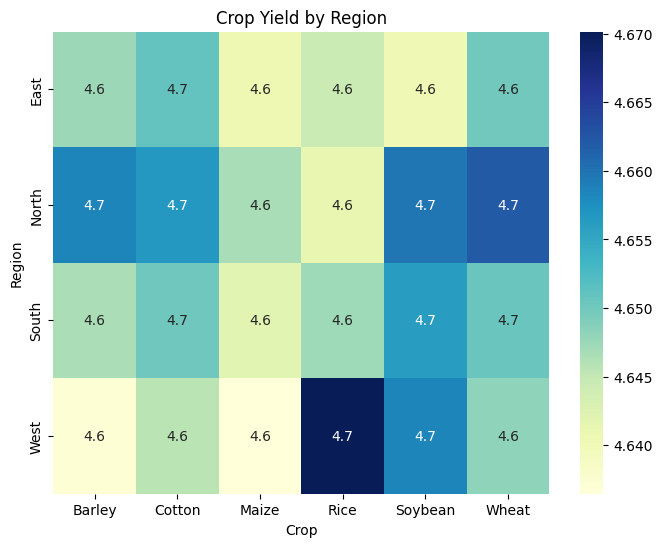

In [21]:
# HEATMAP OF YIELD BY REGION AND CROP

pivot = crop_yield.pivot(index="region", columns="crop", values="yield")

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Crop Yield by Region")
plt.xlabel("Crop")
plt.ylabel("Region")
plt.show()

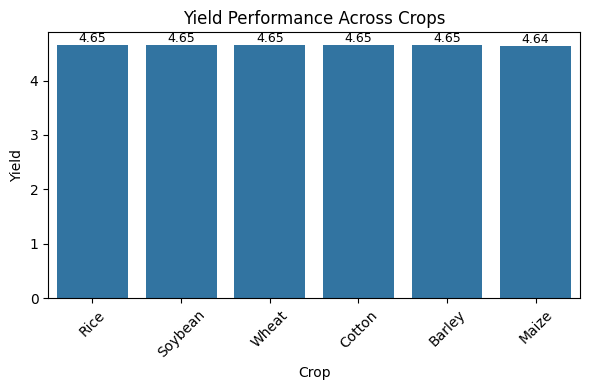

In [22]:
# CROP PERFORMANCE (SORTED)

Highest_crop = data_rename.groupby("crop")[["rainfall", "temperature",
                                            "yield", "harvest_days"]].mean().reset_index()

Highest_crop_sort = Highest_crop.sort_values(
    by=["rainfall", "temperature", "yield", "harvest_days"],
    ascending=False
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x="crop", y="yield", data=Highest_crop_sort)
plt.title("Yield Performance Across Crops")
plt.xlabel("Crop")
plt.ylabel("Yield")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

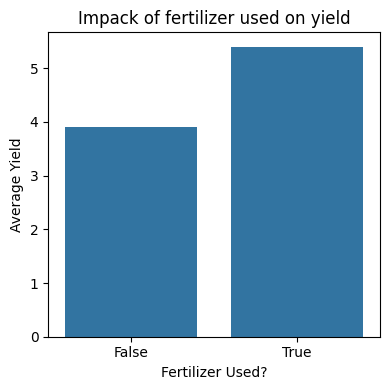

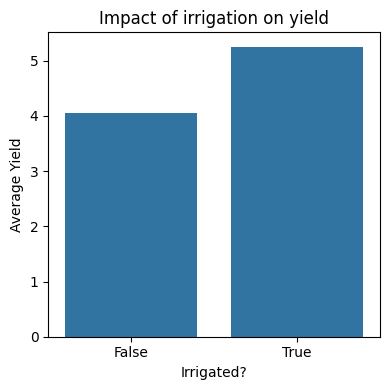

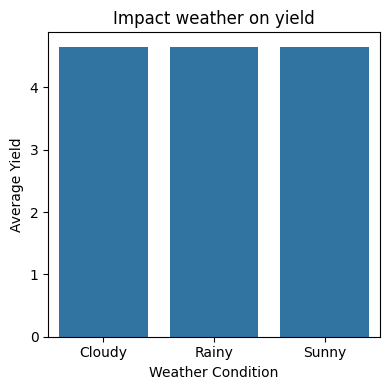

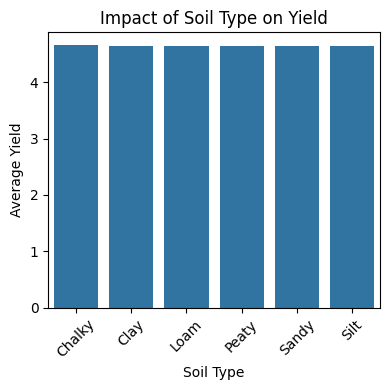

In [23]:
# IMPACT OF FERTILIZER, IRRIGATION & WEATHER ON YIELD

# Impact of fertilizer
fertilizer_used = data_rename.groupby("fertilized")["yield"].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x="fertilized", y="yield", data=fertilizer_used)
plt.title("Impack of fertilizer used on yield")
plt.xlabel("Fertilizer Used?")
plt.ylabel("Average Yield")
plt.tight_layout()
plt.show()

# Impact of irrigation
irrigation = data_rename.groupby("irrigated")["yield"].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x="irrigated", y="yield", data=irrigation)
plt.title("Impact of irrigation on yield")
plt.xlabel("Irrigated?")
plt.ylabel("Average Yield")
plt.tight_layout()
plt.show()

# Impact of weather
weather = data_rename.groupby("weather")["yield"].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x="weather", y="yield", data=weather)
plt.title("Impact weather on yield")
plt.xlabel("Weather Condition")
plt.ylabel("Average Yield")
plt.tight_layout()
plt.show()

# Impact of soil type
soil_type = data_rename.groupby("soil_type")["yield"].mean().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x="soil_type", y="yield", data=soil_type)
plt.title("Impact of Soil Type on Yield")
plt.xlabel("Soil Type")
plt.ylabel("Average Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# SELECT FEATURES FOR MACHINE LEARNING

# Independent variables (inputs)
feature = data_rename[["rainfall", "temperature"]]

# Dependent variable (output)
target = data_rename["yield"]

In [25]:
# TRAIN–TEST SPLIT FOR MODELING

X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.3, random_state=123
)

Linear Regression Results:
R² score: 0.591856980817058
MSE: 1.1745052865835994


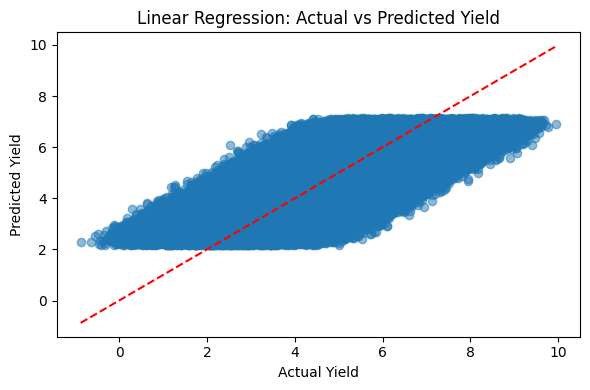

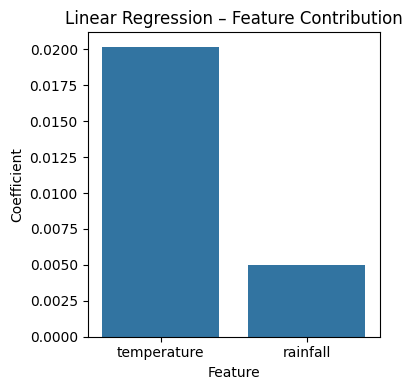

In [26]:
# LINEAR REGRESSION MODEL

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression Results:")
print("R² score:", r2_score(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))

plt.figure(figsize=(6, 4))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted Yield")
plt.tight_layout()
plt.show()

# Linear Regression feature coefficients
lr_importance_df = pd.DataFrame({
    "Feature": feature.columns,
    "Coefficient": lr.coef_
}).sort_values("Coefficient", ascending=False)

plt.figure(figsize=(4, 4))
sns.barplot(x="Feature", y="Coefficient", data=lr_importance_df)
plt.title("Linear Regression – Feature Contribution")
plt.tight_layout()
plt.show()

R² score: 0.5907302395970895
MSE: 1.177747688039133


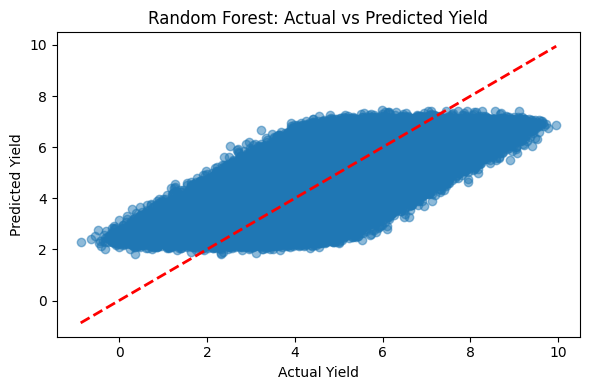

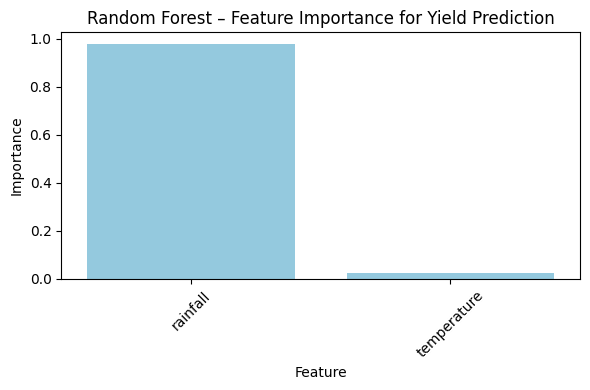

In [27]:
# RANDOM FOREST MODEL
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=123,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("R² score:", r2_score(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))

plt.figure(figsize=(6, 4))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.title("Random Forest: Actual vs Predicted Yield")
plt.tight_layout()
plt.show()


# RANDOM FOREST FEATURE IMPORTANCE
importance_df = pd.DataFrame({
    "Feature": feature.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x="Feature", y="Importance", data=importance_df, color="skyblue")
plt.title("Random Forest – Feature Importance for Yield Prediction")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

